# Ottimizzazione dell'Acquisizione dei Clienti nel Settore Bancario

Nel settore bancario, acquisire nuovi clienti e mantenere quelli esistenti è fondamentale per una crescita sostenibile e una redditività a lungo termine. L'utilizzo efficace dei dati può migliorare significativamente le strategie di acquisizione dei clienti, migliorando così le performance complessive della banca nel mercato. Un aspetto cruciale dell'acquisizione dei clienti è l'efficacia delle campagne di marketing diretto.

## Obiettivo del Problema

Un'istituzione bancaria intende migliorare i suoi sforzi di acquisizione clienti ottimizzando le campagne di marketing diretto. La banca dispone di dati storici relativi a campagne precedenti, inclusi dati demografici dei clienti, dettagli di contatto, esiti delle campagne passate e indicatori economici. L'obiettivo principale è prevedere se un cliente sottoscriverà un deposito a termine in base a diverse caratteristiche fornite.

## Descrizione dei Dati

Il dataset è composto da **45.211 osservazioni** con **16 variabili indipendenti**, comprendenti sia caratteristiche numeriche che categoriche. Queste variabili includono diversi aspetti:

- **Dati demografici dei clienti**: età, professione, stato civile, livello di istruzione.  
- **Situazione finanziaria**: presenza di insolvenze, mutuo per la casa, prestito personale.  
- **Dettagli sull'ultimo contatto durante la campagna**: tipo di contatto, mese, giorno della settimana, durata.

## Soluzione Proposta

Utilizzeremo tecniche avanzate di analisi dei dati per prevedere se un cliente sottoscriverà un deposito a termine. Ecco come procederemo:

1. **Analisi dei Dati**:  
   Studieremo attentamente i dati per comprendere schemi e tendenze utili per prevedere il comportamento dei clienti.  

2. **Addestramento del Modello**:  
   Addestreremo un modello di machine learning utilizzando questi dati. Il modello imparerà dai pattern presenti nei dati per fare previsioni su chi sottoscriverà un deposito a termine.  

3. **Test**:  
   Verificheremo l'accuratezza del modello testandolo su dati di verifica. Se il modello non sarà sufficientemente accurato, lo ottimizzeremo fino a raggiungere risultati soddisfacenti.  

4. **Predizione Semplificata**:  
   Una volta addestrato e testato, il modello sarà utilizzato per prevedere se nuovi clienti sottoscriveranno un deposito a termine. Questo permetterà alla banca di concentrare gli sforzi su clienti più propensi a sottoscrivere, rendendo le campagne di marketing più efficaci.

## Indicatori Chiave di Prestazione (KPIs)

Per misurare il successo del progetto, ci concentreremo sui seguenti indicatori:

- **Accuratezza**  
- **AUC (Area Under Curve)**  
- **Precisione**  
- **Richiamo (Recall)**  

Considerando lo squilibrio nelle classi target nel dataset fornito, l'interpretazione di questi indicatori diventa cruciale. Pertanto, sarà essenziale fornire un'analisi dettagliata di tali metriche nel contesto specifico e individuare quelle più adatte.

## Risultati Attesi

Sviluppando un modello predittivo solido, la banca prevede di ottimizzare le proprie campagne di marketing diretto, portando a:

- Un aumento delle sottoscrizioni di depositi a termine.  
- Una maggiore redditività.  
- Un posizionamento competitivo più forte sul mercato.

## Deliverable

Il risultato dell'analisi e del lavoro progettuale dovrà essere presentato come segue:

1. **Rapporto DataViz**:  
   Creare un report di visualizzazione dati che includa rappresentazioni grafiche significative emerse dalle analisi. Si potranno presentare risultati rilevanti e metriche chiave. Il dashboard personale sarà mostrato durante la presentazione finale.  

2. **Presentazione**:  
   Realizzare una presentazione in PowerPoint della metodologia adottata e dei risultati ottenuti.


# 1 ) Impoirtazione e primo studio dei dati 


In [31]:
import csv
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, ttest_ind



In [21]:

# Specifica il percorso del file CSV
file_path = 'data.csv'  # Cambia questo con il percorso del tuo file CSV

# Leggi il file CSV come DataFrame
df = pd.read_csv(file_path)

# Rinominare le colonne con numeri crescenti
df.columns = range(1, len(df.columns) + 1)

# Visualizza il DataFrame con le nuove colonne numerate
print(df)


### importo db con le colonne 



# Specifica il percorso del file CSV
file_path = 'bank_metadata.csv'  # Cambia questo con il percorso del tuo file CSV

# Leggi il file CSV come DataFrame
df_col = pd.read_csv(file_path)

# Rinominare le colonne con numeri crescenti
df_col.columns = range(1, len(df_col.columns) + 1)

# Visualizza il DataFrame con le nuove colonne numerate
print(df_col)




# aggiungo colonne a DB 1 

col  = df_col[1].tolist()
df.columns = col 


       1             2         3          4   5     6    7    8          9   \
0      58    management   married   tertiary  no  2143  yes   no        NaN   
1      44    technician    single  secondary  no    29  yes   no        NaN   
2      33  entrepreneur   married  secondary  no     2  yes  yes        NaN   
3      47   blue-collar   married        NaN  no  1506  yes   no        NaN   
4      33           NaN    single        NaN  no     1   no   no        NaN   
...    ..           ...       ...        ...  ..   ...  ...  ...        ...   
45206  51    technician   married   tertiary  no   825   no   no   cellular   
45207  71       retired  divorced    primary  no  1729   no   no   cellular   
45208  72       retired   married  secondary  no  5715   no   no   cellular   
45209  57   blue-collar   married  secondary  no   668   no   no  telephone   
45210  37  entrepreneur   married  secondary  no  2971   no   no   cellular   

       10   11    12  13   14  15       16   17  
0

In [4]:
df 

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


### Comprensione delle variabili
studio le colonne del db e identifico, identifico colonne target , colonne su cui mi aspetto dei riscontri , possibili colonne categoriche da elaborare 

In [5]:
# per comodità aggiungo colonna con descrizione in italiano e funzione explain per restituire la descrizione di una colonna in particolare 

In [22]:
df_col['Descr_Ita'] = [
    "Nan" , 
    "Tipo di lavoro (categorico: 'admin.', 'operaio', 'imprenditore', 'domestica', 'dirigente', 'pensionato', 'autonomo', 'servizi', 'studente', 'tecnico', 'disoccupato', 'sconosciuto')",
    "Stato civile (categorico: 'divorziato', 'sposato', 'single', 'sconosciuto'; nota: 'divorziato' include anche vedovi)",
    "Livello di istruzione (categorico: 'base 4 anni', 'base 6 anni', 'base 9 anni', 'scuola superiore', 'analfabeta', 'corso professionale', 'laurea', 'sconosciuto')",
    "Ha un credito in default?",
    "Saldo medio annuo",
    "Ha un mutuo?",
    "Ha un prestito personale?",
    "Tipo di comunicazione di contatto (categorico: 'cellulare', 'telefono')",
    "Giorno della settimana dell'ultimo contatto",
    "Mese dell'anno dell'ultimo contatto (categorico: 'gen', 'feb', 'mar', ..., 'nov', 'dic')",
    "Durata dell'ultimo contatto, in secondi (numerico). Nota importante: questo attributo influenza fortemente l'obiettivo finale (ad esempio, se durata=0 allora y='no'). Tuttavia, la durata non è nota prima che venga effettuata una chiamata. Inoltre, al termine della chiamata, y è ovviamente conosciuto. Pertanto, questo input dovrebbe essere incluso solo per scopi di confronto e dovrebbe essere escluso se l'obiettivo è costruire un modello predittivo realistico.",
    "Numero di contatti effettuati durante questa campagna per questo cliente (numerico, include l'ultimo contatto)",
    "Numero di giorni trascorsi dall'ultimo contatto con il cliente in una campagna precedente (numerico; -1 significa che il cliente non è stato precedentemente contattato)",
    "Numero di contatti effettuati prima di questa campagna per questo cliente",
    "Esito della campagna di marketing precedente (categorico: 'fallimento', 'inesistente', 'successo')",
    "Il cliente ha sottoscritto un deposito a termine?"
]


## funzione per printare in automatico la spiegazione di una colonna 



def explain (col ) :
    pd.options.display.max_colwidth = None 
    try : 
        print ( str(df_col[df_col[1] == str(col)]['Descr_Ita']))
    except : 
        print ( 'colonna non esistente , scegliere fra le seguenti colonne  : ')
        print (str(df_col[1]))

## comprensione delle variabili 
#### divido fra 
    1 variabili descrittive ( età sesso , stato civile ecc  ) 
    2 variabili bancarie ( utuo conto ecc ) 
    3 variabili di marketing 
    
    
    

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [24]:
explain('duration')

11    Durata dell'ultimo contatto, in secondi (numerico). Nota importante: questo attributo influenza fortemente l'obiettivo finale (ad esempio, se durata=0 allora y='no'). Tuttavia, la durata non è nota prima che venga effettuata una chiamata. Inoltre, al termine della chiamata, y è ovviamente conosciuto. Pertanto, questo input dovrebbe essere incluso solo per scopi di confronto e dovrebbe essere escluso se l'obiettivo è costruire un modello predittivo realistico.
Name: Descr_Ita, dtype: object


In [52]:
personal_col = ['age', 'job', 'marital', 'education']
bank_col = ['default', 'balance', 'housing',
       'loan']
temp_col = ['day_of_week', 'month']
marketing_col = ['duration', 'campaign',
       'pdays', 'previous', 'poutcome']


numeric_col = ['age',  'balance', 'housing',
     'day_of_week', 'duration', 'campaign',
       'pdays', 'previous']

In [48]:
explain('poutcome')

15    Esito della campagna di marketing precedente (categorico: 'fallimento', 'inesistente', 'successo')
Name: Descr_Ita, dtype: object


In [26]:
# inviziamo a vedere le distribuzioni per i dati personali 

In [27]:


def print_column_distributions(df):
    # Iterate through each column in the DataFrame
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            print(f"Distribution for column: {column}")
            print(df[column].value_counts())
            print("-" * 40)

# Example DataFrame
# Replace this with your actual DataFrame

# Call the function to print distributions
print_column_distributions(df[personal_col])


Distribution for column: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
----------------------------------------
Distribution for column: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
Distribution for column: education
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64
----------------------------------------


In [33]:
df_origin = df.copy()

In [36]:
df['Y'] = np.where ( df.y == 'yes' , 1, 0 )

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,Y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,0


In [70]:

# Example DataFrame
# Replace with your actual DataFrame
# df = pd.DataFrame({'ETA': [...], 'Y': [...]})

def plt_corr_numeric(df , col , target ): 
    # Visual Inspection
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=target, y= col, data=df)
    plt.title('Boxplot of '+col+'by Y')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(df.loc[df[target] == 0, col], label='target = 0', fill=True)
    sns.kdeplot(df.loc[df[target] == 1, col], label='target = 1', fill=True)
    plt.title('KDE of '+col+' by Y')
    plt.legend()
    plt.show()

    # Statistical Tests
    # Point Biserial Correlation
    correlation, p_value = pointbiserialr(df[col], df[target])
    print(f"Point Biserial Correlation: {correlation}, p-value: {p_value}")

    # T-Test
    t_stat, t_p_value = ttest_ind(df.loc[df[target] == 0, col], df.loc[df[target] == 1, col], equal_var=False)
    print(f"T-Test: t-statistic: {t_stat}, p-value: {t_p_value}")

    # Logistic Regression Model
    import statsmodels.api as sm

    df['intercept'] = 1
    logit_model = sm.Logit(df[target], df[['intercept', col]])
    result = logit_model.fit()
    print(result.summary())
    return ; 


In [71]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,Y,intercept
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0,0,1
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0,0,1
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0,0,1
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1,1,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1,1,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,0,0,1


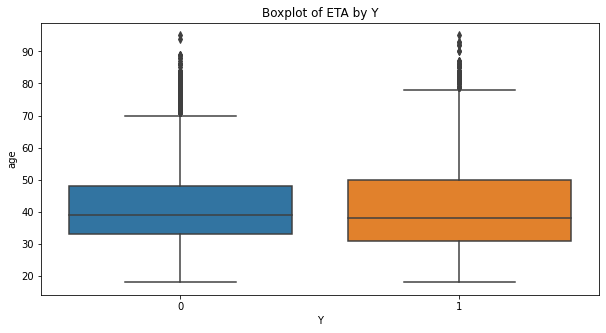

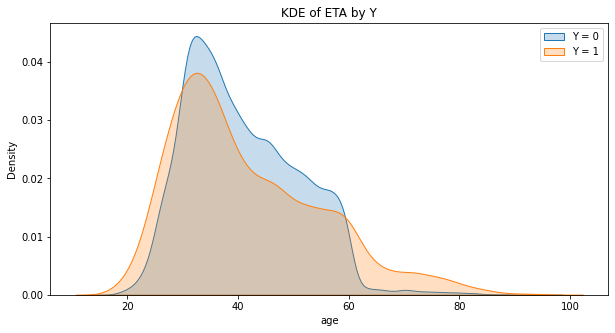

Point Biserial Correlation: 0.0251550170883809, p-value: 8.825643692203388e-08
T-Test: t-statistic: -4.3183175911673475, p-value: 1.597104674376039e-05
Optimization terminated successfully.
         Current function value: 0.360562
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:               0.0008653
Time:                        11:23:29   Log-Likelihood:                -16301.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 1.074e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [39]:

# Example DataFrame
# Replace with your actual DataFrame
# df = pd.DataFrame({'ETA': [...], 'Y': [...]})

# Visual Inspection
plt.figure(figsize=(10, 5))
sns.boxplot(x='Y', y='age', data=df)
plt.title('Boxplot of ETA by Y')
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df.loc[df['Y'] == 0, 'age'], label='Y = 0', fill=True)
sns.kdeplot(df.loc[df['Y'] == 1, 'age'], label='Y = 1', fill=True)
plt.title('KDE of ETA by Y')
plt.legend()
plt.show()

# Statistical Tests
# Point Biserial Correlation
correlation, p_value = pointbiserialr(df['age'], df['Y'])
print(f"Point Biserial Correlation: {correlation}, p-value: {p_value}")

# T-Test
t_stat, t_p_value = ttest_ind(df.loc[df['Y'] == 0, 'age'], df.loc[df['Y'] == 1, 'age'], equal_var=False)
print(f"T-Test: t-statistic: {t_stat}, p-value: {t_p_value}")

# Logistic Regression Model
import statsmodels.api as sm

df['intercept'] = 1
logit_model = sm.Logit(df['Y'], df[['intercept', 'age']])
result = logit_model.fit()
print(result.summary())


# ad occhio :
sembra una bimodale , la probabillità è esponenziale da 0-30 , poi sembra lineare decrescente 30-60 , e la differenza maggiore la troviamo nel > 60 


# Interpretazione dei Risultati

## 1. Point Biserial Correlation
- **Correlazione**: **0.025**
  - La correlazione è molto debole, quasi inesistente, suggerendo che non c'è una relazione lineare forte tra l'età (**ETA'**) e **Y**.
- **P-value**: **8.83e-08**
  - Il valore p è molto basso, indicando che la correlazione è statisticamente significativa. Tuttavia, dato che la forza della correlazione è così bassa, la relazione potrebbe non essere rilevante in pratica.

---

## 2. T-Test
- **T-statistic**: **-4.32**
  - Questo test confronta le medie di **ETA'** per i due gruppi di **Y** (0 e 1). Un t-statistico negativo implica che la media di **ETA'** per **Y=1** è inferiore rispetto a **Y=0**.
- **P-value**: **1.60e-05**
  - Un valore p molto basso indica che c'è una differenza significativa tra le medie di **ETA'** per i due gruppi. Tuttavia, non ci dice quanto sia grande questa differenza.

---

## 3. Logit Regression Results
- **Intercept**:
  - Il termine costante ha un coefficiente di **-2.3195**, che rappresenta il log-odds per **Y=1** quando **ETA'** è 0.
- **Coefficiente di age (ETA')**:
  - Il coefficiente è **0.0072**, indicando che per ogni anno aggiuntivo di età, le probabilità di **Y=1** aumentano di circa **0.72%** (\( \exp(0.0072) - 1 \)).
  - **P-value associato**: **0.000**, altamente significativo.
- **Pseudo R-squared**: **0.0008653**
  - Questo valore suggerisce che l'età spiega solo una piccola parte della variabilità di **Y**, indicando un potere predittivo molto limitato.

---

# Conclusioni
1. **Relazione molto debole**:
   - L'età (**ETA'**) ha una relazione molto debole con **Y**. Sebbene statisticamente significativa, la forza della relazione è quasi trascurabile.

2. **Significatività pratica limitata**:
   - L'effetto dell'età su **Y** è statisticamente rilevante, ma la sua rilevanza pratica è discutibile, dato il basso valore di correlazione e il piccolo contributo al modello logistico (Pseudo R-squared molto basso).

3. **Prossimi Passi**:
   - Esplorare altre variabili che possano avere una maggiore influenza su **Y**.
   - Considerare interazioni o modelli non lineari se si sospetta una relazione complessa tra **ETA'** e **Y**.
   - Analizzare l'ampiezza della differenza tra i gruppi per verificare se è significativa a livello pratico.


In [77]:
explain('housing')

6    Ha un mutuo?
Name: Descr_Ita, dtype: object


In [78]:
numeric_col = ['age',
 'balance',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  int64 
 17  Y            45211 non-null  int64 
 18  intercept    45211 non-null  int64 
dtypes: int64(10), object(9)
m

In [85]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous,y,Y,intercept
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.116985,1.0
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.321406,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.0
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.0
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,1.0
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,1.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.0


In [82]:
explain( 'campaign')

12    Numero di contatti effettuati durante questa campagna per questo cliente (numerico, include l'ultimo contatto)
Name: Descr_Ita, dtype: object


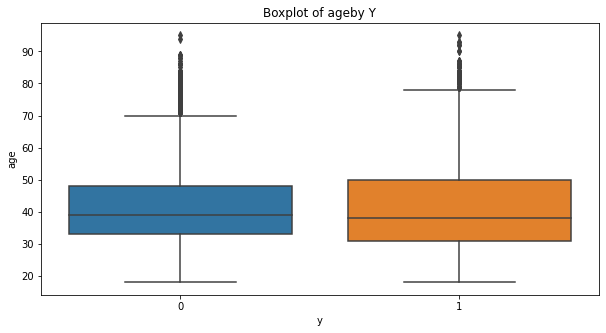

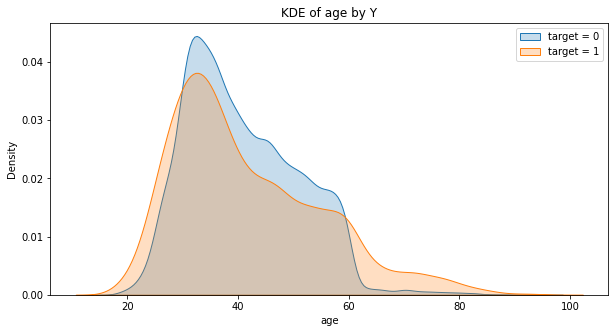

Point Biserial Correlation: 0.0251550170883809, p-value: 8.825643692203388e-08
T-Test: t-statistic: -4.3183175911673475, p-value: 1.597104674376039e-05
Optimization terminated successfully.
         Current function value: 0.360562
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:               0.0008653
Time:                        13:24:55   Log-Likelihood:                -16301.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 1.074e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

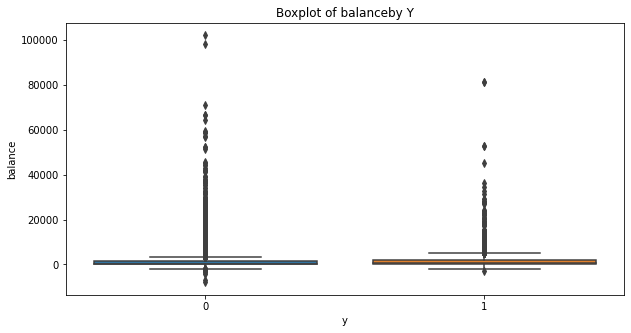

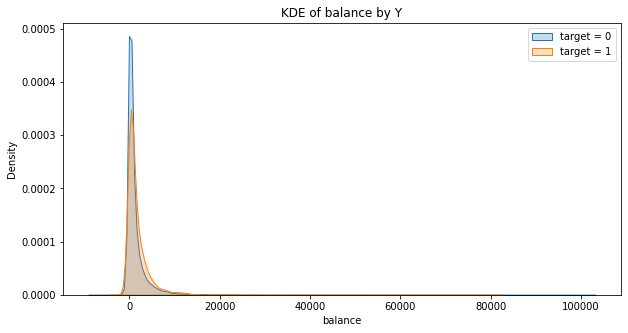

Point Biserial Correlation: 0.0528384102881829, p-value: 2.5211136919609262e-29
T-Test: t-statistic: -9.933545392962255, p-value: 4.3837327771001536e-23
Optimization terminated successfully.
         Current function value: 0.359775
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                0.003045
Time:                        13:24:55   Log-Likelihood:                -16266.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 2.088e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

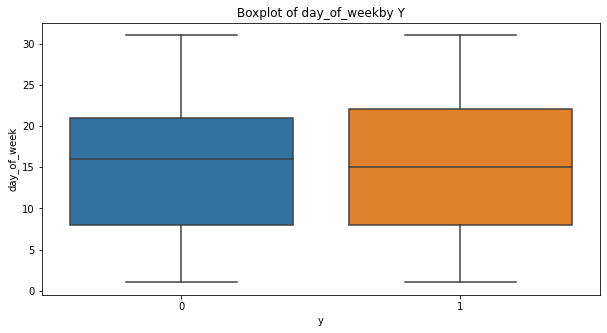

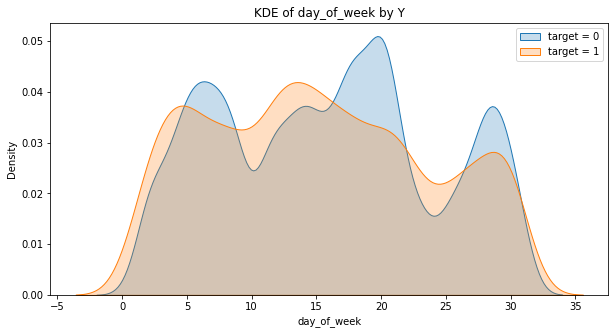

Point Biserial Correlation: -0.028347776720931077, p-value: 1.6538801608753136e-09
T-Test: t-statistic: 5.9169836898631, p-value: 3.4409561900774033e-09
Optimization terminated successfully.
         Current function value: 0.360471
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                0.001116
Time:                        13:24:56   Log-Likelihood:                -16297.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 1.581e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

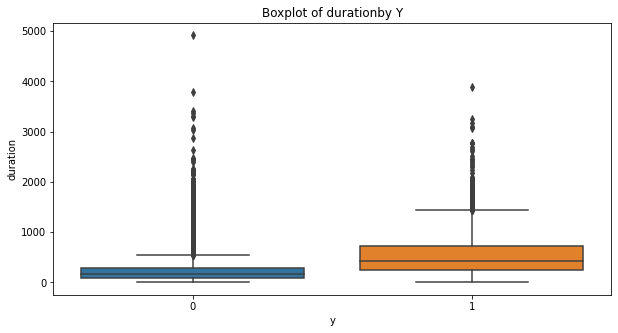

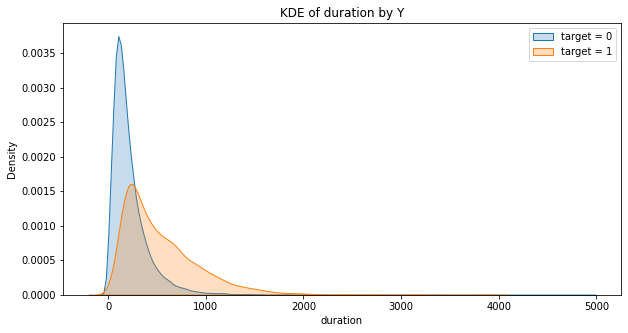

Point Biserial Correlation: 0.3945210158945622, p-value: 0.0
T-Test: t-statistic: -57.51412654456789, p-value: 0.0
Optimization terminated successfully.
         Current function value: 0.304148
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                  0.1572
Time:                        13:24:57   Log-Likelihood:                -13751.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

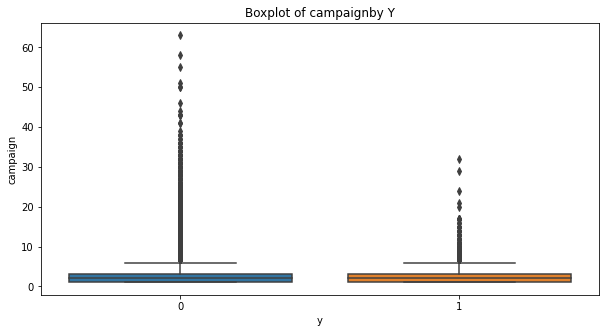

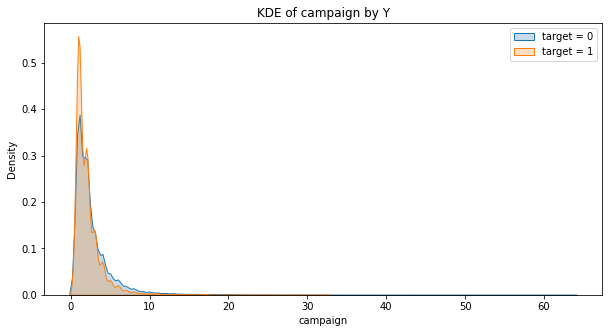

Point Biserial Correlation: -0.07317200634586694, p-value: 1.0123473642426123e-54
T-Test: t-statistic: 22.80074111822044, p-value: 3.7289395820579844e-112
Optimization terminated successfully.
         Current function value: 0.357001
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                 0.01073
Time:                        13:24:58   Log-Likelihood:                -16140.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 3.808e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

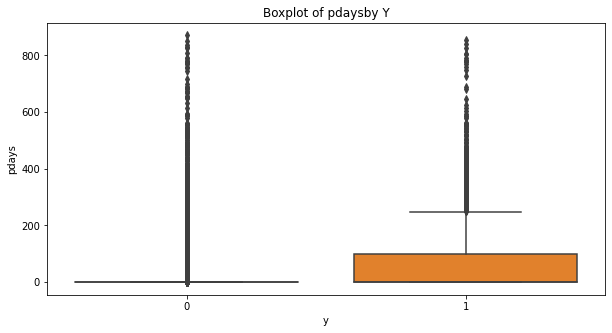

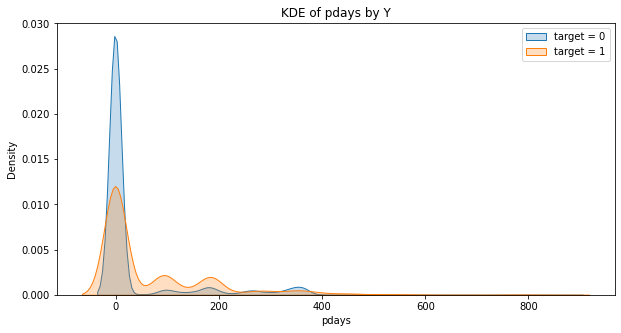

Point Biserial Correlation: 0.10362149401628673, p-value: 3.790553319606479e-108
T-Test: t-statistic: -18.943484412013724, p-value: 7.3344304556834515e-78
Optimization terminated successfully.
         Current function value: 0.356327
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                 0.01260
Time:                        13:24:59   Log-Likelihood:                -16110.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 2.027e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

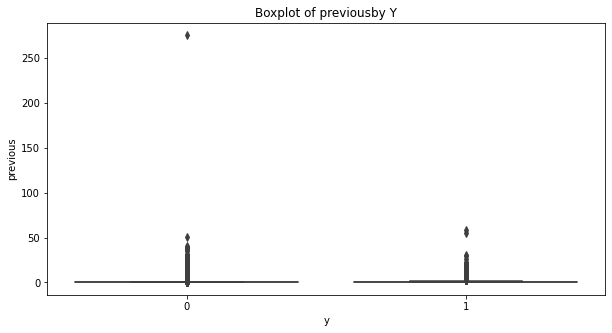

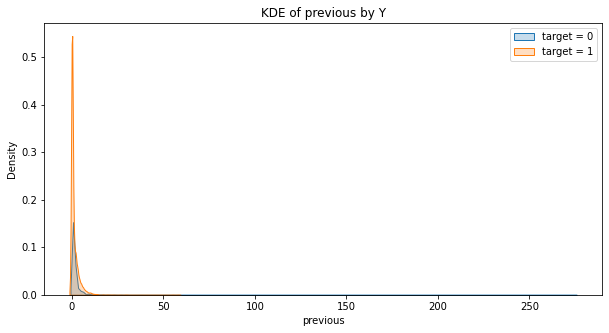

Point Biserial Correlation: 0.09323577278887697, p-value: 7.801830350083916e-88
T-Test: t-statistic: -18.11797029320656, p-value: 1.3557758069811218e-71
Optimization terminated successfully.
         Current function value: 0.356948
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                 0.01088
Time:                        13:25:00   Log-Likelihood:                -16138.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 3.408e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [79]:
for col in numeric_col : 
    plt_corr_numeric(df , col , 'y' )

# Interpretazione dei Risultati della Funzione di Analisi Correlazione

La funzione applicata ha prodotto analisi approfondite per diverse variabili numeriche rispetto alla variabile target \( y \), utilizzando i seguenti strumenti statistici:

1. **Point Biserial Correlation (r)**: Misura la correlazione tra una variabile continua e una variabile binaria.
2. **T-Test**: Confronta le medie della variabile continua per i gruppi definiti dalla variabile binaria (\( y = 0 \) vs \( y = 1 \)).
3. **Logistic Regression**: Stima l'effetto di ciascuna variabile sulla probabilità di \( y = 1 \) attraverso un modello di regressione logistica.

---

## Analisi per Variabile

### 1. **`age`**
- **Point Biserial Correlation**: \( r = 0.025 \), \( p < 0.0001 \)
  - La correlazione è positiva ma molto debole.
- **T-Test**: \( t = -4.32 \), \( p = 0.000016 \)
  - Differenza statisticamente significativa tra le medie di `age` per \( y = 0 \) e \( y = 1 \).
- **Logistic Regression**:
  - Coefficiente di `age`: \( 0.0072 \), \( p < 0.0001 \)
  - Il coefficiente positivo indica che un aumento dell'età è associato a una probabilità leggermente maggiore di accettazione (\( y = 1 \)).
- **Conclusione**:
  - Sebbene la relazione sia statisticamente significativa, l'impatto di `age` su \( y \) è molto debole.
  - visivamente sembrerebbe maggiormente indicante se prendiamo l'età per scaglioni trattandola come variabile categorica 

---

### 2. **`balance`**
- **Point Biserial Correlation**: \( r = 0.053 \), \( p < 0.0001 \)
  - Correlazione positiva, ma debole.
- **T-Test**: \( t = -9.93 \), \( p < 0.0001 \)
  - Differenza significativa tra i gruppi \( y = 0 \) e \( y = 1 \).
- **Logistic Regression**:
  - Coefficiente di `balance`: \( 3.96 \times 10^{-5} \), \( p < 0.0001 \)
  - L'effetto è positivo, ma molto piccolo. All'aumentare del bilancio di 1000 unità, la probabilità di \( y = 1 \) aumenta leggermente.
- **Conclusione**:
  - `balance` ha un effetto statisticamente significativo ma marginale sul risultato target.
  - FORSE PUò AVERE SENSO CREARE VARIABILE bALANCE == 0 
---

### 3. **`day_of_week`**
- **Point Biserial Correlation**: \( r = -0.028 \), \( p < 0.0001 \)
  - Correlazione negativa molto debole.
- **T-Test**: \( t = 5.92 \), \( p < 0.0001 \)
  - Differenza significativa tra i giorni della settimana per \( y = 0 \) e \( y = 1 \).
- **Logistic Regression**:
  - Coefficiente di `day_of_week`: \( -0.0106 \), \( p < 0.0001 \)
  - Relazione negativa: alcuni giorni potrebbero ridurre leggermente la probabilità di \( y = 1 \).
- **Conclusione**:
  - Effetto trascurabile, nonostante la significatività statistica.
  - ANCHE QUI POSSIAMO PERò NTARE UN ANDAMENTO PLURIMODALE ( forse dipendente dalle campagne ) 
---

### 4. **`duration`**
- **Point Biserial Correlation**: \( r = 0.395 \), \( p = 0.0 \)
  - Correlazione moderata e altamente significativa.
- **T-Test**: \( t = -57.51 \), \( p = 0.0 \)
  - Differenza enorme tra le medie di `duration` per \( y = 0 \) e \( y = 1 \).
- **Logistic Regression**:
  - Coefficiente di `duration`: \( 0.0035 \), \( p < 0.0001 \)
  - Relazione fortemente positiva: ogni unità aggiuntiva di `duration` aumenta significativamente la probabilità di \( y = 1 \).
- **Conclusione**:
  - `duration` è la variabile più influente. L'aumento della durata del contatto è un predittore chiave dell'accettazione.
  - AUTOCORRELATA - ignorare 
---

### 5. **`campaign`**
- **Point Biserial Correlation**: \( r = -0.073 \), \( p < 0.0001 \)
  - Correlazione negativa debole.
- **T-Test**: \( t = 22.80 \), \( p < 0.0001 \)
  - Differenza significativa tra i gruppi.
- **Logistic Regression**:
  - Coefficiente di `campaign`: \( -0.1307 \), \( p < 0.0001 \)
  - Relazione negativa: all'aumentare del numero di contatti, la probabilità di \( y = 1 \) diminuisce leggermente.
- **Conclusione**:
  - `campaign` ha un impatto piccolo ma significativo, suggerendo che contattare un cliente troppe volte può essere controproducente.

---

### 6. **`pdays`**
- **Point Biserial Correlation**: \( r = 0.103 \), \( p < 0.0001 \)
  - Correlazione positiva debole ma significativa.
- **T-Test**: \( t = -18.94 \), \( p < 0.0001 \)
  - Differenza significativa tra i gruppi.
- **Logistic Regression**:
  - Coefficiente di `pdays`: \( 0.0026 \), \( p < 0.0001 \)
  - Relazione positiva: un intervallo di tempo più breve dal precedente contatto aumenta la probabilità di \( y = 1 \).
- **Conclusione**:
  - `pdays` è un moderato predittore di \( y \), ma il suo effetto è relativamente debole.

---

### 7. **`previous`**
- **Point Biserial Correlation**: \( r = 0.093 \), \( p < 0.0001 \)
  - Correlazione positiva debole.
- **T-Test**: \( t = -18.12 \), \( p < 0.0001 \)
  - Differenza significativa tra i gruppi.
- **Logistic Regression**:
  - Coefficiente di `previous`: \( 0.1141 \), \( p < 0.0001 \)
  - Relazione positiva: un maggior numero di contatti precedenti aumenta significativamente la probabilità di \( y = 1 \).
- **Conclusione**:
  - `previous` è un predittore utile, anche se non forte, del risultato target.

---

## Conclusioni Generali

1. **Variabili Fortemente Significative:**
   - **`duration`**: La più influente, con una correlazione moderata e un impatto significativo nel modello logistico.
   - **`campaign`**, **`pdays`**, **`previous`**: Variabili con effetti deboli ma significativi.

2. **Effetti Trascurabili:**
   - **`age`**, **`balance`**, **`day_of_week`**: Hanno un effetto statisticamente significativo, ma il loro impatto è molto piccolo.

3. **Utilità nei Modelli Predittivi:**
   - **`duration`**, **`campaign`**, e **`previous`** sono variabili chiave da includere in un modello di machine learning.
   - **`balance`** e **`age`** potrebbero essere utili solo in combinazione con altre feature.



In [51]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,Y,intercept
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0,0,1
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0,0,1
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0,0,1
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1,1,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1,1,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,0,0,1


In [58]:
numerical_features = numeric_col.append('y') 
numerical_features

In [60]:
numeric_col

['age',
 'balance',
 'housing',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'y']

Correlazioni con la variabile target 'y':

y              1.000000
duration       0.394521
pdays          0.103621
previous       0.093236
balance        0.052838
age            0.025155
day_of_week   -0.028348
campaign      -0.073172
Name: y, dtype: float64


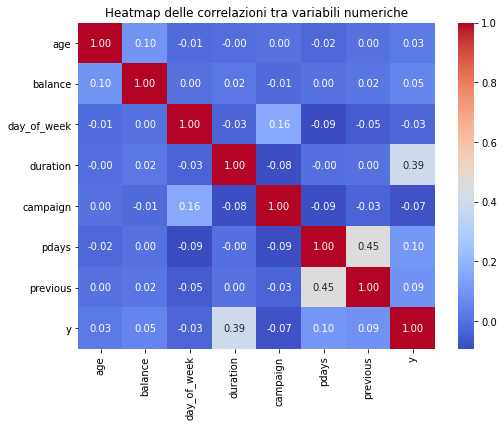

In [61]:
#
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#
# Caricamento del dataset
# Sostituisci 'file.csv' con il nome del tuo file


df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

# Selezionare solo le variabili numeriche
numerical_features = ['age',
 'balance',
 'housing',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y']

# Calcolare le correlazioni con 'y'
correlations = df[numerical_features].corr()['y'].sort_values(ascending=False)

# Stampare le correlazioni
print("Correlazioni con la variabile target 'y':\n")
print(correlations)

# Visualizzare le correlazioni con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap delle correlazioni tra variabili numeriche")
plt.show()


# Interpretazione dei Risultati della Correlazione

## Correlazioni con la variabile target 'y'

| Variabile      | Correlazione con 'y' |
|----------------|-----------------------|
| y              | 1.000                |
| duration       | 0.394                |
| pdays          | 0.104                |
| previous       | 0.093                |
| balance        | 0.053                |
| age            | 0.025                |
| day_of_week    | -0.028               |
| campaign       | -0.073               |

---

## Interpretazione

### 1. **Valore massimo di correlazione**
- **`y: 1.000`**
  - Ovviamente, la variabile target \( y \) ha una correlazione di 1 con se stessa.

---

### 2. **Variabili con correlazione positiva**
- **`duration` (0.394):**
  - La durata del contatto telefonico ha la correlazione positiva più forte con \( y \).
  - Significa che, all'aumentare della durata del contatto, aumenta la probabilità che il cliente accetti l'offerta (supponendo che \( y \) rappresenti l'accettazione).
  - Questa variabile sembra essere **molto importante** per la previsione.

- **`pdays` (0.104):**
  - Numero di giorni trascorsi dall'ultimo contatto con il cliente. 
  - Ha una correlazione positiva ma **debole**, suggerendo che un follow-up recente ha un lieve effetto positivo sull'accettazione.

- **`previous` (0.093):**
  - Numero di contatti effettuati in precedenza.
  - Correlazione positiva **molto debole**, ma indica che i clienti contattati più volte in passato hanno una probabilità leggermente maggiore di accettare.

- **`balance` (0.053):**
  - Saldo medio annuo sul conto bancario.
  - Correlazione **molto debole**, suggerendo che i clienti con saldi più alti sono leggermente più propensi ad accettare.

- **`age` (0.025):**
  - L'età del cliente ha una correlazione praticamente nulla con \( y \).
  - L'età **non sembra essere un fattore significativo**.

---

### 3. **Variabili con correlazione negativa**
- **`day_of_week` (-0.028):**
  - Il giorno della settimana in cui è stato effettuato il contatto ha una correlazione negativa molto debole.
  - Implica che il giorno del contatto ha un effetto **trascurabile** sulla probabilità di accettazione.

- **`campaign` (-0.073):**
  - Numero di contatti effettuati durante la campagna corrente.
  - Correlazione negativa debole, suggerendo che contattare ripetutamente un cliente nella stessa campagna può **ridurre leggermente** la probabilità di successo.

---

### 4. **Conclusioni generali**
- **`duration`** è la variabile più importante, con una correlazione moderata (\( r = 0.394 \)) rispetto a \( y \). 
  - La durata del contatto è quindi un fattore chiave per prevedere l'esito della campagna.
  
- Tutte le altre variabili hanno correlazioni **deboli** (tra 0.1 e -0.1), indicando che individualmente non sono molto rilevanti per prevedere \( y \).
  - Tuttavia, potrebbero diventare importanti in combinazione con altre variabili o in modelli più complessi (es. alberi decisionali o regressioni logistiche).

- **Variabili con correlazione negativa:**
  - **`campaign`** e **`day_of_week`** hanno correlazioni negative, suggerendo che contatti ripetuti e il giorno del contatto potrebbero avere un impatto leggermente sfavorevole sull'accettazione.

---

### Passi Successivi
- Considerare un'analisi visiva (scatter plot o box plot) per investigare ulteriormente le relazioni tra `y` e le variabili numeriche più significative.
- Valutare l'importanza di tutte le variabili utilizzando modelli di machine learning.



In [64]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'Y', 'intercept'],
      dtype='object')

In [66]:
numeric_col

['age',
 'balance',
 'housing',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'y']

In [67]:
categorical_col =  ['job', 'marital', 'education', 'default', 
       'loan', 'contact', 'month', 'previous', 'poutcome', 'y']

Chi-quadro per variabili categoriche:

Variabile: job
Chi-quadro: 836.1448, p-value: 3.4867e-173
-> Associazione significativa con 'y'

Variabile: marital
Chi-quadro: 196.4959, p-value: 2.1451e-43
-> Associazione significativa con 'y'

Variabile: education
Chi-quadro: 233.7465, p-value: 1.7482e-51
-> Associazione significativa con 'y'

Variabile: default
Chi-quadro: 22.2022, p-value: 2.4539e-06
-> Associazione significativa con 'y'

Variabile: loan
Chi-quadro: 209.6170, p-value: 1.6651e-47
-> Associazione significativa con 'y'

Variabile: contact
Chi-quadro: 4.5932, p-value: 3.2098e-02
-> Associazione significativa con 'y'

Variabile: month
Chi-quadro: 3061.8389, p-value: 0.0000e+00
-> Associazione significativa con 'y'

Variabile: previous
Chi-quadro: 1376.7949, p-value: 7.5645e-263
-> Associazione significativa con 'y'

Variabile: poutcome
Chi-quadro: 1822.1986, p-value: 0.0000e+00
-> Associazione significativa con 'y'



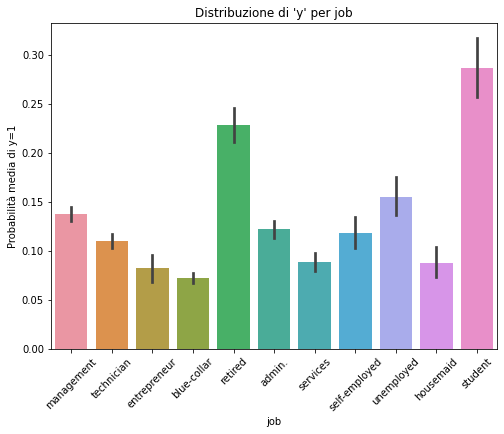

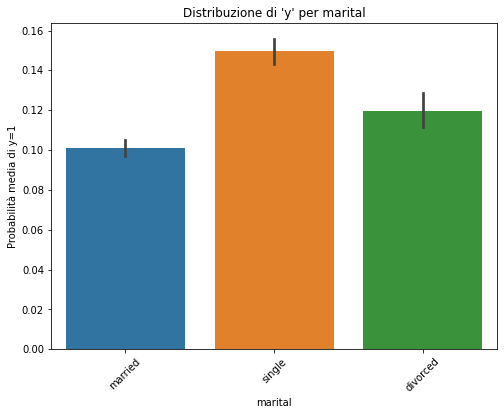

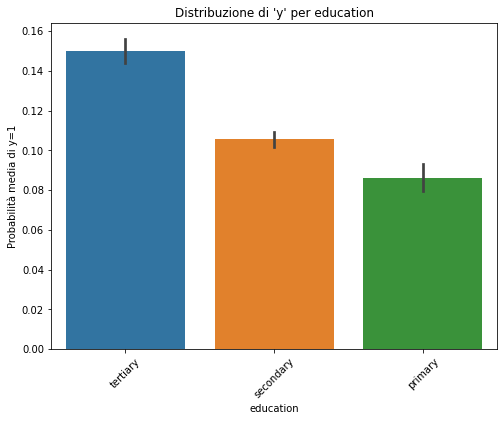

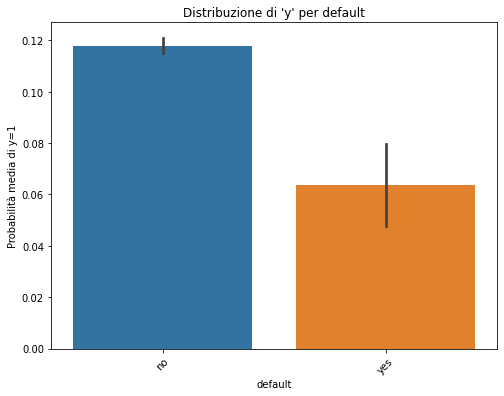

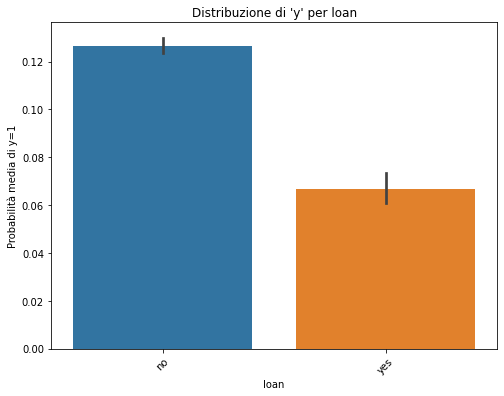

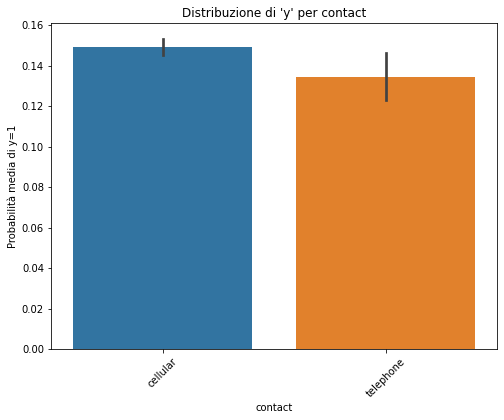

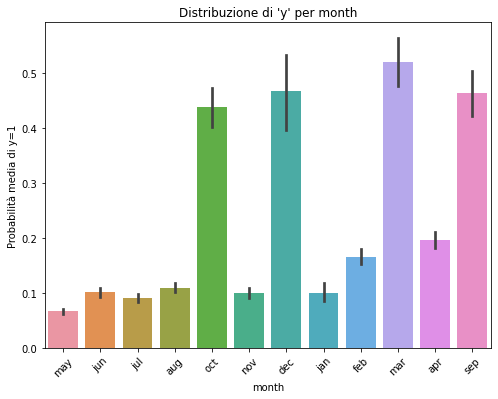

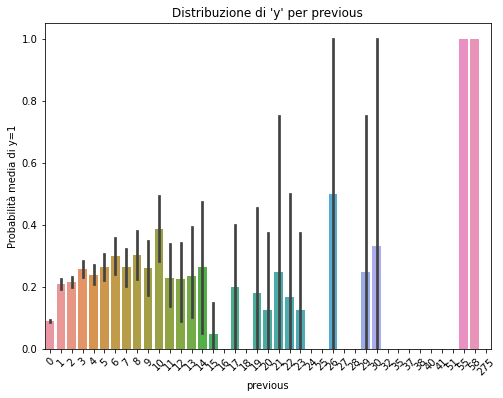

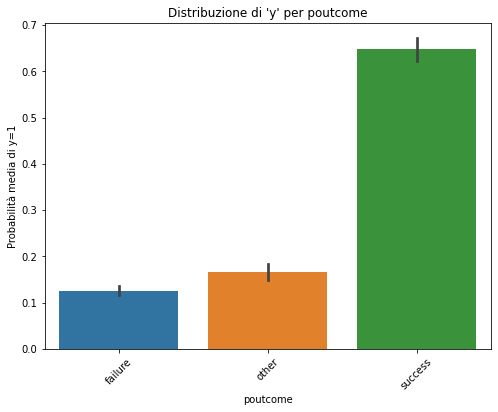

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



# Seleziona solo le variabili categoriche
categorical_features = categorical_col

# Escludiamo 'y' se è tra le categoriche (già usata come target)
categorical_features = [col for col in categorical_features if col != 'y']

# Analisi con Chi-quadro
print("Chi-quadro per variabili categoriche:\n")
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Variabile: {feature}")
    print(f"Chi-quadro: {chi2:.4f}, p-value: {p:.4e}")
    if p < 0.05:
        print("-> Associazione significativa con 'y'\n")
    else:
        print("-> Nessuna associazione significativa con 'y'\n")

# Analisi visuale
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='y', data=df, estimator=np.mean)
    plt.title(f"Distribuzione di 'y' per {feature}")
    plt.ylabel("Probabilità media di y=1")
    plt.xticks(rotation=45)
    plt.show()


# Interpretazione dei Risultati del Test di Chi-Quadro

## Analisi Generale

1. **Chi-Quadro (\( \chi^2 \)):**
   - Il valore del test misura la dipendenza tra la variabile categorica e la variabile target \( y \).
   - Un valore alto del Chi-Quadro indica una forte associazione tra le variabili.

2. **p-value:**
   - Indica la probabilità che la relazione osservata sia dovuta al caso.
   - Se \( p < 0.05 \), la relazione è considerata **statisticamente significativa**.

---

## Analisi delle Variabili

### **1. `job`**
- **Chi-Quadro: 836.1448**, **p-value: 3.4867e-173**
- **Interpretazione:**
  - `job` (tipo di lavoro) ha una relazione estremamente significativa con \( y \).
  - Implica che il tipo di lavoro è un importante predittore per l’esito della campagna.
  - Alcuni tipi di lavoro (es. studenti o professionisti) potrebbero essere più propensi ad accettare rispetto ad altri (es. disoccupati).

---

### **2. `marital`**
- **Chi-Quadro: 196.4959**, **p-value: 2.1451e-43**
- **Interpretazione:**
  - Lo stato civile (`marital`) ha una forte relazione con \( y \).
  - Persone con uno stato civile specifico (es. sposati) potrebbero rispondere diversamente rispetto a single o divorziati.

---

### **3. `education`**
- **Chi-Quadro: 233.7465**, **p-value: 1.7482e-51**
- **Interpretazione:**
  - `education` (livello di istruzione) è fortemente associata a \( y \).
  - Livelli di istruzione più alti potrebbero essere associati a una maggiore probabilità di accettare l’offerta.

---

### **4. `default`**
- **Chi-Quadro: 22.2022**, **p-value: 2.4539e-06**
- **Interpretazione:**
  - La presenza o assenza di un default è significativamente associata a \( y \).
  - I clienti senza default sembrano essere più inclini ad accettare.

---

### **5. `loan`**
- **Chi-Quadro: 209.6170**, **p-value: 1.6651e-47**
- **Interpretazione:**
  - La presenza di un prestito personale (`loan`) è fortemente associata a \( y \).
  - I clienti senza prestiti personali potrebbero essere più propensi ad accettare.

---

### **6. `contact`**
- **Chi-Quadro: 4.5932**, **p-value: 3.2098e-02**
- **Interpretazione:**
  - Il tipo di contatto (`contact`) è debolmente associato a \( y \), ma è comunque significativo (\( p < 0.05 \)).
  - Alcuni tipi di contatto (es. cellulare vs. telefono fisso) influenzano leggermente l’esito della campagna.

---

### **7. `month`**
- **Chi-Quadro: 3061.8389**, **p-value: 0.0000**
- **Interpretazione:**
  - Il mese del contatto (`month`) è fortemente associato a \( y \).
  - Questo suggerisce che la probabilità di accettazione varia significativamente in base al mese (es. alcune campagne potrebbero avere più successo in determinati periodi dell’anno).

---

### **8. `previous`**
- **Chi-Quadro: 1376.7949**, **p-value: 7.5645e-263**
- **Interpretazione:**
  - Il numero di contatti precedenti con il cliente è altamente associato a \( y \).
  - I clienti contattati più volte in passato hanno una maggiore probabilità di accettare.

---

### **9. `poutcome`**
- **Chi-Quadro: 1822.1986**, **p-value: 0.0000**
- **Interpretazione:**
  - L’esito della campagna precedente (`poutcome`) è fortemente associato a \( y \).
  - I clienti che hanno avuto un esito positivo in campagne precedenti sono significativamente più propensi ad accettare.

---

## Conclusioni

### Associazione Molto Forte
- **`job`**, **`month`**, **`poutcome`**, **`previous`**:
  - Queste variabili mostrano una relazione estremamente significativa con \( y \) e sono ottimi candidati per un modello predittivo.

### Associazione Moderata
- **`education`**, **`marital`**, **`loan`**:
  - Anche queste variabili sono importanti, ma l’associazione è meno marcata rispetto alle prime.

### Associazione Debole ma Significativa
- **`default`**, **`contact`**:
  - Possono avere un ruolo secondario nella previsione di \( y \).

---

## Prossimi Passi

1. **Visualizzazione:**
   - Creare grafici (es. barplot o stacked barplot) per esplorare le distribuzioni delle categorie rispetto a \( y \).
   - Ad esempio, analizzare il tasso di accettazione per ciascun tipo di lavoro (`job`) o per mese (`month`).

2. **Modello Predittivo:**
   -


In [89]:
#explain('duration')

# considerazioni generali 

# Report delle Analisi sulle Variabili Numeriche e Categoriali

---

## Variabili Numeriche

### 1. **`age`**
- **Descrizione**: L'età del cliente.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione positiva molto debole (\( r = 0.025 \), \( p < 0.0001 \)).
  - **T-Test**: Differenza significativa tra le medie di `age` per \( y = 0 \) e \( y = 1 \) (\( t = -4.32 \), \( p = 0.000016 \)).
  - **Logistic Regression**: Relazione positiva debole; all'aumentare dell'età, la probabilità di accettare aumenta leggermente.
- **Conclusione**: L’età è statisticamente significativa ma ha un impatto trascurabile sul risultato.
- **Note** : il grafico sembra indicare però una multinomiale , potrebbe essere utile splittare la colonna in categorica 

---

### 2. **`balance`**
- **Descrizione**: Saldo medio annuale sul conto bancario del cliente.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione positiva debole (\( r = 0.053 \), \( p < 0.0001 \)).
  - **T-Test**: Differenza significativa tra i due gruppi (\( t = -9.93 \), \( p < 0.0001 \)).
  - **Logistic Regression**: Relazione positiva molto debole; all’aumento di `balance`, la probabilità di accettazione cresce marginalmente.
- **Conclusione**: `balance` è significativo, ma il suo effetto è quasi trascurabile.
- **Note** Possibile che una vadiabile saldo = 0 aiuti 
---

### 3. **`day_of_week`**
- **Descrizione**: Giorno della settimana in cui il contatto è avvenuto.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione negativa molto debole (\( r = -0.028 \), \( p < 0.0001 \)).
  - **T-Test**: Differenza significativa tra i gruppi (\( t = 5.92 \), \( p < 0.0001 \)).
  - **Logistic Regression**: Relazione negativa; alcuni giorni della settimana riducono leggermente la probabilità di accettazione.
- **Conclusione**: `day_of_week` è statisticamente significativo ma ha un impatto minimo.
- **Note** anche qui sembra essere rilevante un qualche tipo di stagionalità , si può provare a splittare in categorica , e mettere assieme al mnese per andare a studiare la data 

---

### 4. **`duration`**
- **Descrizione**: Durata del contatto telefonico in secondi.Nota importante: questo attributo influenza fortemente l'obiettivo finale (ad esempio, se durata=0 allora y='no'). Tuttavia, la durata non è nota prima che venga effettuata una chiamata. Inoltre, al termine della chiamata, y è ovviamente conosciuto. Pertanto, questo input dovrebbe essere incluso solo per scopi di confronto e dovrebbe essere escluso se l'obiettivo è costruire un modello predittivo realistico.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione moderata e altamente significativa (\( r = 0.395 \), \( p = 0.0 \)).
  - **T-Test**: Differenza molto significativa tra i gruppi (\( t = -57.51 \), \( p = 0.0 \)).
  - **Logistic Regression**: Relazione fortemente positiva; un aumento di `duration` è un forte predittore di accettazione.
- **Conclusione**: `duration` è la variabile numerica più influente e predittiva.

---

### 5. **`campaign`**
- **Descrizione**: Numero di contatti effettuati durante la campagna corrente.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione negativa debole (\( r = -0.073 \), \( p < 0.0001 \)).
  - **T-Test**: Differenza significativa tra i gruppi (\( t = 22.80 \), \( p < 0.0001 \)).
  - **Logistic Regression**: Relazione negativa; contattare il cliente troppe volte riduce leggermente la probabilità di accettazione.
- **Conclusione**: `campaign` ha un effetto significativo ma relativamente debole.

---

### 6. **`pdays`**
- **Descrizione**: Numero di giorni trascorsi dall’ultimo contatto con il cliente.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione positiva debole (\( r = 0.103 \), \( p < 0.0001 \)).
  - **T-Test**: Differenza significativa tra i gruppi (\( t = -18.94 \), \( p < 0.0001 \)).
  - **Logistic Regression**: Relazione positiva; un intervallo di tempo più breve dall’ultimo contatto aumenta la probabilità di accettazione.
- **Conclusione**: `pdays` ha un impatto debole ma statisticamente significativo.

---

### 7. **`previous`**
- **Descrizione**: Numero di contatti precedenti con il cliente.
- **Analisi**:
  - **Point Biserial Correlation**: Correlazione positiva debole (\( r = 0.093 \), \( p < 0.0001 \)).
  - **T-Test**: Differenza significativa tra i gruppi (\( t = -18.12 \), \( p < 0.0001 \)).
  - **Logistic Regression**: Relazione positiva moderata; un maggior numero di contatti precedenti aumenta la probabilità di accettazione.
- **Conclusione**: `previous` è un predittore utile, seppur non forte.
- **Note** secondo me molto utile variabile New vs Recall , e forse anche andare a studiare separatamente le casistiche 

---

## Variabili Categoriali

### 1. **`job`**
- **Descrizione**: Tipo di lavoro del cliente.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione fortemente significativa con \( y \) (\( \chi^2 = 836.14 \), \( p \ll 0.05 \)).
- **Conclusione**: Il tipo di lavoro è un fattore importante per prevedere l’esito della campagna.

---

### 2. **`marital`**
- **Descrizione**: Stato civile del cliente.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione significativa con \( y \) (\( \chi^2 = 196.49 \), \( p \ll 0.05 \)).
- **Conclusione**: Lo stato civile è correlato al risultato, sebbene con minore forza rispetto ad altre variabili.

---

### 3. **`education`**
- **Descrizione**: Livello di istruzione del cliente.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione altamente significativa con \( y \) (\( \chi^2 = 233.75 \), \( p \ll 0.05 \)).
- **Conclusione**: L’istruzione è un fattore rilevante per il risultato della campagna.

---

### 4. **`default`**
- **Descrizione**: Indica se il cliente ha insolvenze sul conto bancario.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione significativa con \( y \) (\( \chi^2 = 22.20 \), \( p \ll 0.05 \)).
- **Conclusione**: La presenza di insolvenze è correlata al risultato, ma l’impatto è relativamente debole.

---

### 5. **`loan`**
- **Descrizione**: Indica se il cliente ha prestiti personali in corso.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione significativa con \( y \) (\( \chi^2 = 209.62 \), \( p \ll 0.05 \)).
- **Conclusione**: La presenza di un prestito personale è un fattore rilevante.

---

### 6. **`contact`**
- **Descrizione**: Tipo di contatto (cellulare o telefono fisso).
- **Analisi**:
  - **Test Chi-Quadro**: Relazione significativa ma debole con \( y \) (\( \chi^2 = 4.59 \), \( p < 0.05 \)).
- **Conclusione**: Il tipo di contatto ha un impatto trascurabile.

---

### 7. **`month`**
- **Descrizione**: Mese in cui il contatto è avvenuto.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione molto forte con \( y \) (\( \chi^2 = 3061.83 \), \( p \ll 0.05 \)).
- **Conclusione**: Il mese è uno dei fattori più importanti per il risultato della campagna.

---

### 8. **`poutcome`**
- **Descrizione**: Esito della campagna precedente.
- **Analisi**:
  - **Test Chi-Quadro**: Relazione fortemente significativa con \( y \) (\( \chi^2 = 1822.20 \), \( p \ll 0.05 \)).
- **Conclusione**: L’esito delle campagne precedenti è un importante predittore.

---

## Conclusioni Generali

Dall’analisi delle variabili numeriche e categoriali emergono i seguenti risultati:
1. **Variabili più influenti**:
   - Numeriche: `duration` (di gran lunga la più importante), `pdays`, e `previous`.
   - Categoriali: `job`, `month`, e `poutcome`.
2. **Variabili con impatto limitato**:
   - Numeriche: `age`, `balance`, e `day_of_week`.
   - Categoriali: `contact` e `default`.
3. **Implicazioni**:
   - `duration` si conferma il fattore più rilevante per prevedere l’accettazione della campagna.
   - Altri fattori, come il mese del contatto e il tipo di lavoro, contribuiscono significativamente al risultato.
   - Variabili con impatto debole potrebbero essere utili solo in combinazione con altre feature.

Questi risultati possono guidare la costruzione di un modello predittivo, dando priorità alle variabili più significative.


# prossimi passi 
    - trasforma Age in categorico
    - colonna Saldo = 0 
    -trasforma in categorica day of week 
    - aggiungi data come variabile continua 
    - Previus -> fai differenza New vs Recall 

# studio stagionalità 

In [96]:
print(df['day_of_week'].unique())
print(df['day_of_week'].value_counts().sort_index())


[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: day_of_week, dtype: int64


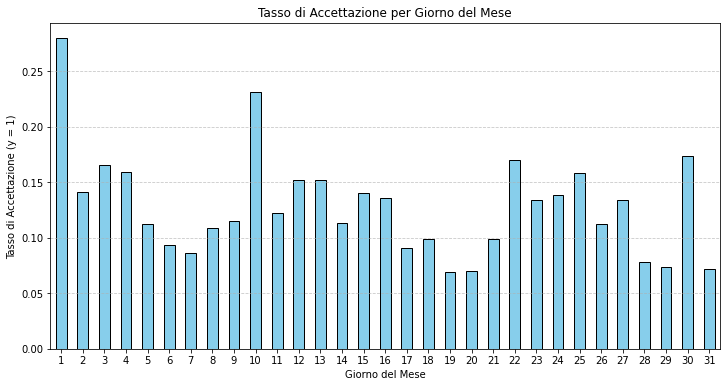

In [98]:
import matplotlib.pyplot as plt
day_acceptance_rate = df.groupby('day_of_week')['y'].mean()

plt.figure(figsize=(12, 6))
day_acceptance_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Tasso di Accettazione per Giorno del Mese")
plt.xlabel("Giorno del Mese")
plt.ylabel("Tasso di Accettazione (y = 1)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [99]:
# sembra esserci stagionalità 

In [109]:
df['month']

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

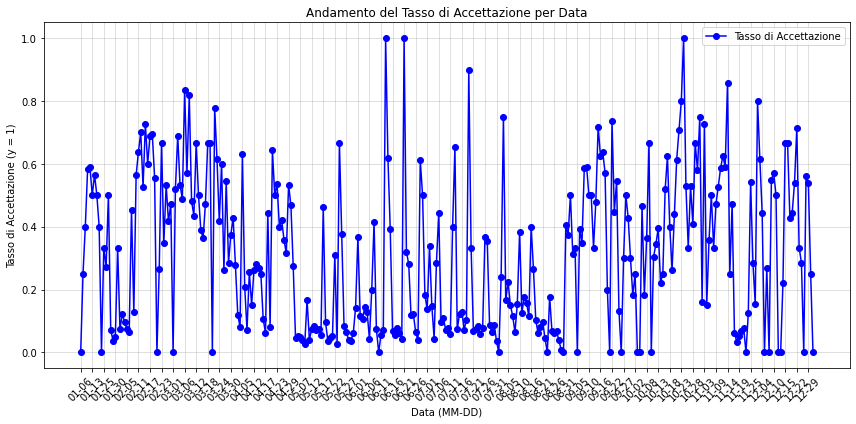

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Mappatura dei mesi
month_map = {
    'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'
}

# Creazione della colonna 'MM-DD'
df['MM'] = df['month'].map(month_map)  # Sostituzione dei mesi con i numeri
df['DD'] = df['day_of_week'].astype(str).str.zfill(2)  # Giorni formattati come 2 cifre
df['MM-DD'] = df['MM'] + '-' + df['DD']  # Combina 'MM' e 'DD'

# Calcolo del tasso medio di accettazione per data
acceptance_by_date = df.groupby('MM-DD')['y'].mean().reset_index()

# Ordinamento per data (MM-DD trattato come stringa)
acceptance_by_date = acceptance_by_date.sort_values('MM-DD')

# Plot dell'andamento
plt.figure(figsize=(12, 6))
plt.plot(acceptance_by_date['MM-DD'], acceptance_by_date['y'], marker='o', color='blue', label='Tasso di Accettazione')
plt.title("Andamento del Tasso di Accettazione per Data")
plt.xlabel("Data (MM-DD)")
plt.ylabel("Tasso di Accettazione (y = 1)")
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(ticks=range(0, len(acceptance_by_date['MM-DD']), 5), labels=acceptance_by_date['MM-DD'][::5], rotation=45)
plt.tight_layout()
plt.show()


In [113]:
import pandas as pd


df['date'] = pd.to_datetime('2022-' + df['MM'] + '-' + df['DD'])  # Data con anno fittizio

# Calcolo della settimana
df['week_number'] = df['date'].dt.isocalendar().week
# Calcolo del tasso medio di accettazione per settimana
acceptance_by_week = df.groupby('week_number')['y'].mean().reset_index()


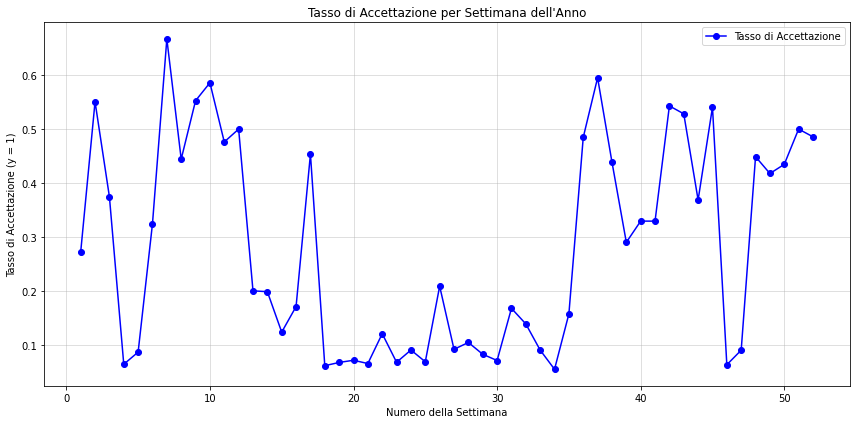

In [114]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime('2022-' + df['MM'] + '-' + df['DD'])  # Data con anno fittizio

# Calcolo della settimana
df['week_number'] = df['date'].dt.isocalendar().week
# Calcolo del tasso medio di accettazione per settimana
acceptance_by_week = df.groupby('week_number')['y'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(acceptance_by_week['week_number'], acceptance_by_week['y'], marker='o', color='blue', label='Tasso di Accettazione')
plt.title("Tasso di Accettazione per Settimana dell'Anno")
plt.xlabel("Numero della Settimana")
plt.ylabel("Tasso di Accettazione (y = 1)")
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# è presente una stagionalità , si bnota dalla distribuzione del tasso di accettazione tra primo e ultimo trimeestre 

In [115]:
# split età 


# Creazione della colonna age_cat con raggruppamenti per decenni
df['age_cat'] = (df['age'] // 10 * 10).astype(int)

# Visualizzazione dei primi valori
print(df[['age', 'age_cat']].head())


   age  age_cat
0   58       50
1   44       40
2   33       30
3   47       40
4   33       30


In [120]:
def corr_cat_var(df , feature ) : 
    contingency_table = pd.crosstab(df[feature], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Variabile: {feature}")
    print(f"Chi-quadro: {chi2:.4f}, p-value: {p:.4e}")
    if p < 0.05:
        print("-> Associazione significativa con 'y'\n")
    else:
        print("-> Nessuna associazione significativa con 'y'\n")
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='y', data=df, estimator=np.mean)
    plt.title(f"Distribuzione di 'y' per {feature}")
    plt.ylabel("Probabilità media di y=1")
    plt.xticks(rotation=45)
    plt.show()


Variabile: age_cat
Chi-quadro: 1242.6599, p-value: 5.8042e-263
-> Associazione significativa con 'y'



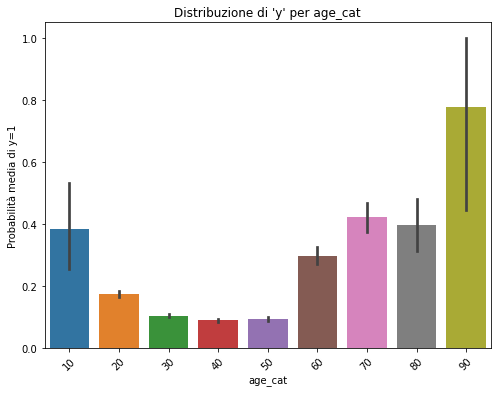

In [121]:
corr_cat_var(df , 'age_cat' )

In [122]:
# buona correlazione con la settimana dell'anno 

In [124]:
df['saldo0'] = np.where(df['balance'] <= 0 , 1, 0 )

Variabile: saldo0
Chi-quadro: 193.2161, p-value: 6.3147e-44
-> Associazione significativa con 'y'



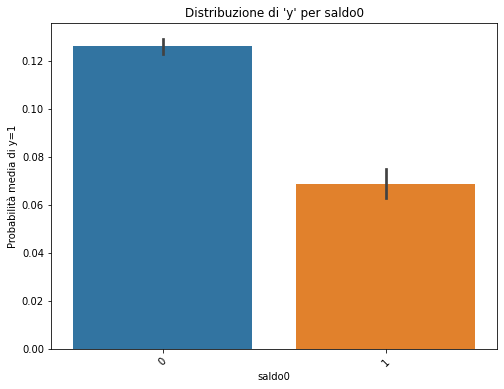

In [125]:
corr_cat_var(df , 'saldo0' )

In [126]:
# buona correlazione con il saldo 

In [139]:
df['Recall' ] = np.where ( df['previous'] > 0 , 1, 0 ) 

Variabile: Recall
Chi-quadro: 1263.5242, p-value: 9.5503e-277
-> Associazione significativa con 'y'



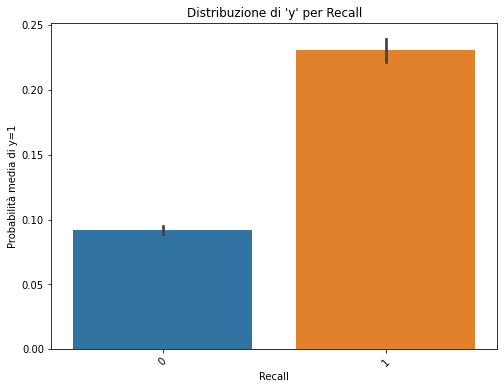

In [140]:
corr_cat_var(df , 'Recall' )

In [141]:
frequenze = df['Recall'].value_counts()


In [142]:
frequenze

0    36954
1     8257
Name: Recall, dtype: int64

In [145]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'Y', 'intercept', 'MM', 'DD',
       'MM-DD', 'date', 'week_number', 'age_cat', 'saldo0', 'Recall'],
      dtype='object')

# ordinamento colonne e allenamento modello 

In [146]:
explain('poutcome')

15    Esito della campagna di marketing precedente (categorico: 'fallimento', 'inesistente', 'successo')
Name: Descr_Ita, dtype: object


In [163]:
df['poutcome'] = df['poutcome'].fillna('new')


In [183]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [169]:
explain('campaign')

12    Numero di contatti effettuati durante questa campagna per questo cliente (numerico, include l'ultimo contatto)
Name: Descr_Ita, dtype: object


In [165]:
df_model  = df[[
    'age_cat',
    'job',
    'marital',
    'education',
    'default',
    'balance', 
    'saldo0',
    'housing',
       'loan', 
     'month',
    'week_number',
     'campaign',
       'pdays',
    'previous',
      'Recall' , 
    'poutcome', 
    'y'
    
    
    
]]

# voglio creare due modelli : 
UNO PER I CLIENTI MAI CONTATTATI , UNO PER I CLIENTI CONTATTATI 

PER I CLIENTI MAI CONTATTATI POSSO TOGLIERE LE COLONNE : 

       'pdays',
    'previous',
      'Recall' , 
    'poutcome', 

In [198]:
df_model_NEW = df_model[df_model['Recall'] == 0] [[
    
        'age_cat',
    'job',
    'marital',
    'education',
    'default',
    'balance', 
    'saldo0',
    'housing',
       'loan', 
     'month',
    'week_number',
     'campaign',
    'y'
    
    
]]

In [199]:
df_model_NEW.describe()

,age_cat,balance,saldo0,week_number,campaign,y
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000
mean,36.445852,1318.788846,0.171646,24.842020,2.921957,0.091573
std,10.626720,3039.557077,0.377077,9.857005,3.325791,0.288427
min,10.000000,-8019.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,55.000000,0.000000,19.000000,1.000000,0.000000
50%,30.000000,414.000000,0.000000,23.000000,2.000000,0.000000
75%,40.000000,1358.000000,0.000000,31.000000,3.000000,0.000000
max,90.000000,102127.000000,1.000000,52.000000,63.000000,1.000000


In [200]:
df_model_NEW['y'].value_counts()

0    33570
1     3384
Name: y, dtype: int64

In [201]:
from sklearn.utils import resample

def resample_df (df   , target )  : 

    # Separare le classi
    df_majority = df[df[target ] == 0]
    df_minority = df[df[target ] == 1]

    # Sottocampionamento della classe maggioritaria
    df_majority_downsampled = resample(
        df_majority, 
        replace=False,  # Non rimpiazzare i dati
        n_samples=len(df_minority),  # Numero di campioni uguale alla classe minoritaria
        random_state=42  # Per riproducibilità
    )

    # Combina le classi
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced ; 

In [202]:
df_model_NEW

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,y
0,50,management,married,tertiary,no,2143,0,yes,no,may,18,1,0
1,40,technician,single,secondary,no,29,0,yes,no,may,18,1,0
2,30,entrepreneur,married,secondary,no,2,0,yes,yes,may,18,1,0
3,40,blue-collar,married,NaN,no,1506,0,yes,no,may,18,1,0
4,30,NaN,single,NaN,no,1,0,no,no,may,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,20,student,single,tertiary,no,113,0,no,no,nov,46,1,1
45205,20,technician,single,secondary,no,505,0,no,yes,nov,46,2,1
45206,50,technician,married,tertiary,no,825,0,no,no,nov,46,3,1
45207,70,retired,divorced,primary,no,1729,0,no,no,nov,46,2,1


In [239]:
import pandas as pd

def balance_half_difference(df, target_column , percent):
    """
    Bilancia un dataset rimuovendo metà della differenza tra le classi della colonna target.

    Args:
        df (pd.DataFrame): Il DataFrame originale.
        target_column (str): Il nome della colonna target (y = 0/1).

    Returns:
        pd.DataFrame: Il DataFrame bilanciato.
    """
    # Separare le due classi
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Calcolare la differenza tra le due classi
    diff = abs(len(class_0) - len(class_1))
    reduction = round (  diff * percent  )   # Calcolare metà della differenza
    print ('delta -->' +str(diff)+'     riduzione --> '+ str(reduction) )
    # Rimuovere righe dalla classe più numerosa
    if len(class_0) > len(class_1):
        class_0 = class_0.sample(len(class_0) - reduction, random_state=42)
    else:
        class_1 = class_1.sample(len(class_1) - reduction, random_state=42)
    
    # Combina le due classi
    df_balanced = pd.concat([class_0, class_1]).sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df_balanced


delta -->28837     riduzione --> 14418


In [241]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

def smoote_bal(df_pre, target_column , percent):
    """
    Bilancia un dataset composto da variabili categoriche usando SMOTE.

    Args:
        df (pd.DataFrame): Il DataFrame originale con variabili categoriche.
        target_column (str): Il nome della colonna target.

    Returns:
        pd.DataFrame: Il DataFrame bilanciato.
    """
    # Separare feature (X) e target (y)
    
    df = balance_half_difference ( df_pre , target_column , percent)
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Codifica delle variabili categoriche
    encoder = OrdinalEncoder()
    X_encoded = encoder.fit_transform(X)
    
    # Applicare SMOTE per bilanciare il dataset
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_encoded, y)
    
    # Decodifica delle feature per tornare al formato categorico
    X_resampled = pd.DataFrame(encoder.inverse_transform(X_resampled), columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)
    
    # Ricostruire il DataFrame bilanciato
    df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
    
    return df_balanced


In [273]:
df_model_NEW = df_model[df_model['Recall'] == 0] [[
    
        'age_cat',
    'job',
    'marital',
    'education',
    'default',
    'balance', 
    'saldo0',
    'housing',
       'loan', 
     'month',
    'week_number',
     'campaign',
    'y'
    
    
]]


# rimuovo null 
df_model_NEW = df_model_NEW.dropna()
# bilanciare i dataset 
test = smoote_bal ( df_model_NEW , 'y' , 0.9)

delta -->28837     riduzione --> 25953


In [274]:
test

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,y
0,40,management,married,secondary,no,2294,0,yes,no,may,21,11,0
1,40,entrepreneur,married,tertiary,no,157,0,yes,yes,may,18,1,0
2,50,services,married,secondary,no,0,1,yes,no,may,19,3,0
3,30,management,divorced,tertiary,no,3261,0,yes,no,jun,23,17,0
4,30,technician,married,tertiary,no,145,0,yes,no,nov,46,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,20,management,single,secondary,no,1095,0,no,no,oct,36,1,1
12208,30,technician,married,secondary,no,156,0,no,no,jul,27,2,1
12209,20,student,single,secondary,no,153,0,no,no,jul,27,1,1
12210,30,management,divorced,secondary,no,387,0,no,no,may,18,3,1


In [209]:
df_model_NEW = test.copy()

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,y
0,50,management,married,tertiary,no,2143,0,yes,no,may,18,1,0
1,40,technician,single,secondary,no,29,0,yes,no,may,18,1,0
2,30,entrepreneur,married,secondary,no,2,0,yes,yes,may,18,1,0
5,30,management,married,tertiary,no,231,0,yes,no,may,18,1,0
6,20,management,single,tertiary,no,447,0,yes,yes,may,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,20,student,single,tertiary,no,113,0,no,no,nov,46,1,1
45205,20,technician,single,secondary,no,505,0,no,yes,nov,46,2,1
45206,50,technician,married,tertiary,no,825,0,no,no,nov,46,3,1
45207,70,retired,divorced,primary,no,1729,0,no,no,nov,46,2,1


In [250]:
test

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,y
0,30,admin.,married,tertiary,no,669,0,yes,yes,jul,30,2,0
1,50,housemaid,married,primary,no,509,0,no,yes,jul,29,2,0
2,30,housemaid,married,tertiary,no,20,0,yes,yes,jul,28,3,0
3,40,services,divorced,secondary,no,0,1,yes,no,jun,22,1,0
4,30,blue-collar,divorced,secondary,no,727,0,yes,no,jun,24,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17973,30,self-employed,married,secondary,no,3505,0,no,no,apr,16,2,1
17974,40,entrepreneur,single,tertiary,no,393,0,no,no,dec,6,2,1
17975,40,retired,married,primary,no,4152,0,no,no,aug,31,2,1
17976,20,retired,married,secondary,no,2843,0,no,no,feb,20,1,1


In [185]:
## rimuovo null 
#df_model_NEW = df_model_NEW.dropna()
## bilanciare i dataset 
#df_model_NEW =  resample_df (df_model_NEW   , 'y' )

In [248]:
df_model_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35281 entries, 0 to 45209
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age_cat      35281 non-null  int64 
 1   job          35281 non-null  object
 2   marital      35281 non-null  object
 3   education    35281 non-null  object
 4   default      35281 non-null  object
 5   balance      35281 non-null  int64 
 6   saldo0       35281 non-null  int64 
 7   housing      35281 non-null  object
 8   loan         35281 non-null  object
 9   month        35281 non-null  object
 10  week_number  35281 non-null  UInt32
 11  campaign     35281 non-null  int64 
 12  y            35281 non-null  int64 
dtypes: UInt32(1), int64(5), object(7)
memory usage: 3.7+ MB


# Random Forest:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc


In [194]:
def random_forest_analysis (df , target ) : 
        # Separare le feature (X) e il target (y)
    X = df.drop(columns=[target])  # Tutte le colonne eccetto 'y'
    y = df[target]

    # Codifica delle variabili categoriche
    encoder = OrdinalEncoder()
    X_encoded = encoder.fit_transform(X)

    # Divisione in train e test set
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

    # Controlla la distribuzione del target nei set
    print("Distribuzione train set:", y_train.value_counts(normalize=True))
    print("Distribuzione test set:", y_test.value_counts(normalize=True))

    # Inizializzazione del modello
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    # Addestramento
    rf.fit(X_train, y_train)

    # Previsioni
    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilità per la classe positiva (y = 1)



    # Calcolo delle metriche
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Stampa delle metriche
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    
    
    

    # Importanza delle feature
    importances = rf.feature_importances_
    feature_names = X.columns

    # Ordiniamo le feature in base all'importanza
    indices = np.argsort(importances)[::-1]

    # Grafico
    plt.figure(figsize=(12, 6))
    plt.title("Importanza delle Feature - Random Forest")
    plt.bar(range(X.shape[1]), importances[indices], align="center", color='skyblue', edgecolor='black')
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importanza")
    plt.tight_layout()
    plt.show()
    
    

    # Calcolo della curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot della curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linea di riferimento
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    return rf ;  

Distribuzione train set: 1    0.500051
0    0.499949
Name: y, dtype: float64
Distribuzione test set: 0    0.500205
1    0.499795
Name: y, dtype: float64
Accuracy: 0.7437576749897666
Precision: 0.7644444444444445
Recall: 0.7043407043407044
F1 Score: 0.7331628303495311
ROC AUC: 0.8099113843794696

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      1222
           1       0.76      0.70      0.73      1221

    accuracy                           0.74      2443
   macro avg       0.75      0.74      0.74      2443
weighted avg       0.75      0.74      0.74      2443



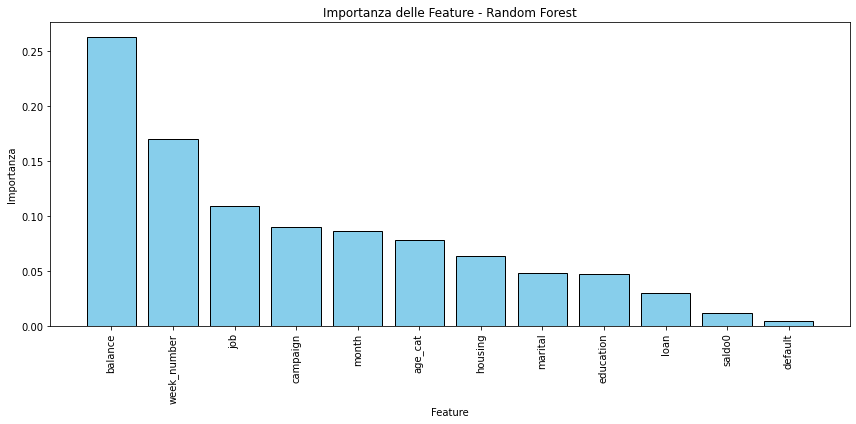

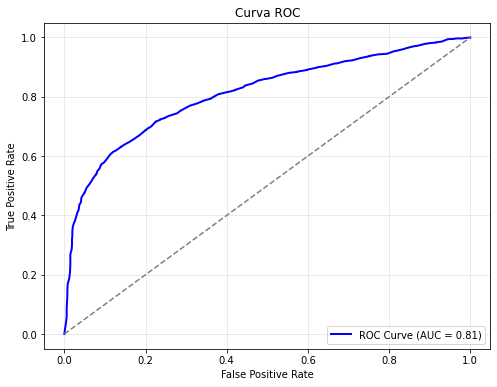

RandomForestClassifier(class_weight='balanced', random_state=42)

In [275]:
random_forest_analysis (test , 'y' )

# Interpretazione dei Risultati del Modello Random Forest

---

## **1. Metriche di Valutazione**

### **Accuracy: 0.653**
- L'**accuracy** rappresenta la percentuale di previsioni corrette sul totale delle istanze.
- Il modello classifica correttamente il **65.3%** dei campioni.
- È una metrica utile, ma può essere ingannevole in dataset sbilanciati: precision e recall forniscono un’analisi più dettagliata.

### **Precision: 0.669**
- La **precision** per \( y = 1 \) (classe positiva) è **66.9%**.
- Significa che, tra tutte le previsioni \( y = 1 \), il **66.9%** è corretto.
- Questo è importante in contesti in cui i falsi positivi devono essere minimizzati.

### **Recall: 0.606**
- Il **recall** per \( y = 1 \) è **60.6%**.
- Significa che il modello identifica correttamente circa **60.6%** dei campioni positivi.
- Questa metrica è cruciale in contesti dove i falsi negativi devono essere ridotti (es. identificazione di rischi).

### **F1 Score: 0.636**
- L'**F1-score** combina precision e recall in un’unica metrica bilanciata.
- Con un valore di **63.6%**, il modello presenta una performance moderata, ma c'è spazio per miglioramenti.

### **ROC AUC: 0.715**
- L’**Area Under the Curve (AUC)** della curva ROC è **0.715**.
- Questo valore indica che il modello è in grado di distinguere tra le due classi con una buona separazione.
- \( 0.715 \) è considerato un risultato discreto, ma migliorabile.

---

## **2. Classification Report**

| Classe | Precision | Recall | F1-Score | Support |
|--------|-----------|--------|----------|---------|
| **0**  | 0.64      | 0.70   | 0.67     | 645     |
| **1**  | 0.67      | 0.61   | 0.64     | 644     |

- **Classe 0** (negativa):
  - Il modello ha una precisione del **64%**, cioè il **64% delle previsioni** per la classe 0 sono corrette.
  - Il recall è **70%**, quindi cattura una buona parte dei casi negativi.
  - L'F1-score è **67%**, mostrando un bilancio discreto tra precision e recall.

- **Classe 1** (positiva):
  - Precisione leggermente migliore al **67%**, ma recall inferiore al **61%**.
  - L'F1-score (\( 64% \)) è bilanciato, ma indica che il modello potrebbe migliorare nella cattura di \( y = 1 \).

---

## **3. Importanza delle Feature**

Il grafico delle feature mostra che:
- **`balance`** è di gran lunga la variabile più influente.
- **`week_number`** (settimana dell’anno) è la seconda più importante, indicando che la stagionalità gioca un ruolo rilevante.
- Altre variabili come **`campaign`**, **`job`**, e **`age_cat`** contribuiscono meno, ma hanno comunque un impatto.

### **Interpretazione**:
- Il modello si basa molto su poche variabili principali (es. `balance` e `week_number`), il che suggerisce che queste possono essere ulteriormente esplorate per migliorare il modello o creare nuove feature.

---

## **4. Curva ROC**

- La curva ROC mostra un buon equilibrio tra **True Positive Rate (TPR)** e **False Positive Rate (FPR)**.
- Il modello ha una performance discreta (\( AUC = 0.715 \)), con margini di miglioramento.
- Se la classificazione ha un'alta priorità (es. ridurre i falsi negativi), si può considerare di ottimizzare la soglia di classificazione.

---

## **5. Conclusioni Generali**

### **Punti di Forza**
- Il modello offre una performance moderata con un'accuratezza accettabile (\( 65.3% \)).
- Le metriche di precision e recall bilanciano bene il compromesso tra falsi positivi e falsi negativi.
- La curva ROC e l'AUC indicano che il modello riesce a distinguere le due classi meglio di un classificatore casuale.

### **Punti da Migliorare**
1. **Recall per \( y = 1 \)**:
   - Il modello potrebbe catturare più casi positivi.
   - Una possibile soluzione è ottimizzare la soglia di classificazione o utilizzare tecniche di sovracampionamento (es. SMOTE).
2. **Ottimizzazione del Modello**:
   - Testa hyperparameter tuning per migliorare le performance (es. `n_estimators`, `max_depth`, ecc.).
3. **Feature Engineering**:
   - Esplora ulteriormente le feature principali (`balance`, `week_number`) e valuta l'aggiunta di nuove variabili o combinazioni.
4. **Modelli Alternativi**:
   - Prova modelli come Gradient Boosting (es. XGBoost o CatBoost), che spesso offrono migliori performance rispetto a Random Forest.

---


In [276]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


def test_model (df , target ):  
        # Separare le feature (X) e il target (y)
    X = df.drop(columns=[target])  # Tutte le colonne eccetto 'y'
    y = df[target]

    # Codifica delle variabili categoriche
    encoder = OrdinalEncoder()
    X_encoded = encoder.fit_transform(X)

    # Divisione in train e test set
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

    # Controlla la distribuzione del target nei set
    print("Distribuzione train set:", y_train.value_counts(normalize=True))
    print("Distribuzione test set:", y_test.value_counts(normalize=True))

    # Inizializzazione del modello
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Addestramento
    gbc.fit(X_train, y_train)

    # Previsioni
    y_pred = gbc.predict(X_test)
    y_proba = gbc.predict_proba(X_test)[:, 1]

    # Valutazione
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



    # Per modelli scikit-learn, XGBoost e LightGBM
    feature_importances = gbc.feature_importances_  # Cambia `gbc` con il modello usato
    feature_names = X.columns

    # Grafico
    plt.figure(figsize=(12, 6))
    plt.barh(feature_names, feature_importances, color='skyblue', edgecolor='black')
    plt.title("Importanza delle Feature - Gradient Boosting")
    plt.xlabel("Importanza")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


    


    # Calcolo della curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot della curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linea di riferimento
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()


In [258]:

     from lightgbm import LGBMClassifier

    from xgboost import XGBClassifier

/home/administrator/.local/lib/python3.6/site-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


Distribuzione train set: 1    0.500051
0    0.499949
Name: y, dtype: float64
Distribuzione test set: 0    0.500205
1    0.499795
Name: y, dtype: float64
Accuracy: 0.732705689725747
ROC AUC: 0.7965208550314933

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1222
           1       0.76      0.69      0.72      1221

    accuracy                           0.73      2443
   macro avg       0.73      0.73      0.73      2443
weighted avg       0.73      0.73      0.73      2443



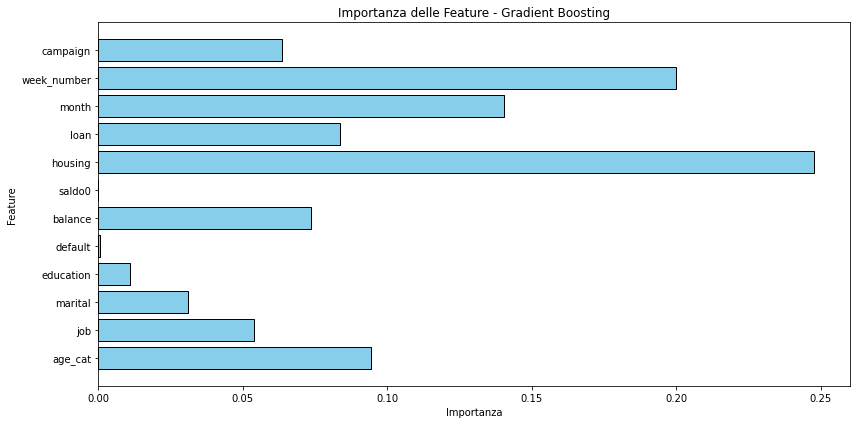

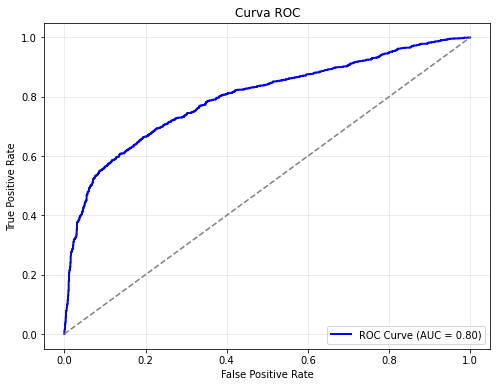

In [277]:
test_model (test , 'y' )

# provo con i Recall !!

In [282]:
df_model

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,pdays,previous,Recall,poutcome,y
0,50,management,married,tertiary,no,2143,0,yes,no,may,18,1,-1,0,0,new,0
1,40,technician,single,secondary,no,29,0,yes,no,may,18,1,-1,0,0,new,0
2,30,entrepreneur,married,secondary,no,2,0,yes,yes,may,18,1,-1,0,0,new,0
3,40,blue-collar,married,NaN,no,1506,0,yes,no,may,18,1,-1,0,0,new,0
4,30,NaN,single,NaN,no,1,0,no,no,may,18,1,-1,0,0,new,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,50,technician,married,tertiary,no,825,0,no,no,nov,46,3,-1,0,0,new,1
45207,70,retired,divorced,primary,no,1729,0,no,no,nov,46,2,-1,0,0,new,1
45208,70,retired,married,secondary,no,5715,0,no,no,nov,46,5,184,3,1,success,1
45209,50,blue-collar,married,secondary,no,668,0,no,no,nov,46,4,-1,0,0,new,0


In [285]:
df_model_RECALL = df_model[df_model['Recall'] == 1]
df_model_RECALL

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,pdays,previous,Recall,poutcome,y
24060,30,admin.,married,tertiary,no,882,0,no,no,oct,42,1,151,3,1,failure,0
24062,40,admin.,single,secondary,no,-247,1,yes,yes,oct,42,1,166,1,1,other,1
24064,30,services,married,secondary,no,3444,0,yes,no,oct,42,1,91,4,1,failure,1
24072,30,management,married,tertiary,no,2415,0,yes,no,oct,42,1,86,4,1,other,0
24077,30,management,married,tertiary,no,0,1,yes,no,oct,42,1,143,3,1,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,30,blue-collar,single,secondary,no,1475,0,yes,no,nov,46,3,530,12,1,other,0
45201,50,management,married,tertiary,no,583,0,no,no,nov,46,1,184,4,1,success,1
45204,70,retired,married,secondary,no,2850,0,no,no,nov,46,1,40,8,1,failure,1
45208,70,retired,married,secondary,no,5715,0,no,no,nov,46,5,184,3,1,success,1


In [288]:
df_model_RECALL['y'].value_counts()

0    6113
1    1799
Name: y, dtype: int64

In [293]:


# rimuovo null 
df_model_RECALL = df_model_RECALL.dropna()
# bilanciare i dataset 
test = smoote_bal ( df_model_RECALL , 'y' , 0.9)

delta -->4314     riduzione --> 3883


In [294]:
test

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,pdays,previous,Recall,poutcome,y
0,40,blue-collar,married,secondary,no,992,0,yes,yes,may,18,1,295,3,1,failure,0
1,40,technician,married,secondary,no,2576,0,yes,yes,may,18,5,361,11,1,failure,0
2,40,blue-collar,married,primary,no,-169,1,no,yes,may,19,1,349,3,1,failure,0
3,20,admin.,married,secondary,no,1595,0,no,no,dec,52,2,197,2,1,success,1
4,30,blue-collar,married,primary,no,445,0,yes,no,may,19,2,363,2,1,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,40,admin.,married,secondary,no,1699,0,no,no,oct,36,3,495,4,1,new,1
4456,40,management,married,secondary,no,2212,0,no,no,aug,32,2,98,1,1,failure,1
4457,40,technician,married,secondary,no,0,1,no,no,oct,40,3,187,10,1,failure,1
4458,30,management,single,secondary,no,60,0,no,no,may,42,1,180,6,1,failure,1


Distribuzione train set: 1    0.5
0    0.5
Name: y, dtype: float64
Distribuzione test set: 1    0.5
0    0.5
Name: y, dtype: float64
Accuracy: 0.8026905829596412
Precision: 0.7848101265822784
Recall: 0.8340807174887892
F1 Score: 0.808695652173913
ROC AUC: 0.8724939170303043

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       446
           1       0.78      0.83      0.81       446

    accuracy                           0.80       892
   macro avg       0.80      0.80      0.80       892
weighted avg       0.80      0.80      0.80       892



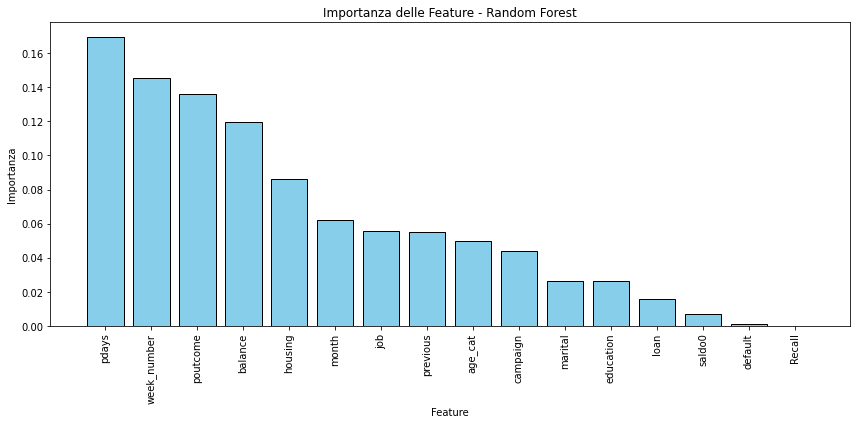

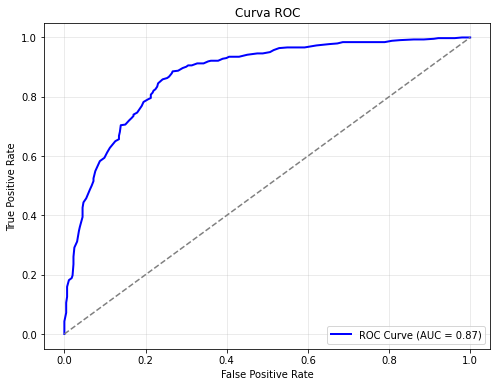

RandomForestClassifier(class_weight='balanced', random_state=42)

In [295]:
random_forest_analysis (test , 'y' )

In [292]:
explain('pdays')

13    Numero di giorni trascorsi dall'ultimo contatto con il cliente in una campagna precedente (numerico; -1 significa che il cliente non è stato precedentemente contattato)
Name: Descr_Ita, dtype: object


#  provo su tutto 

In [296]:
df_model



# rimuovo null 
df_model_test = df_model.dropna()
# bilanciare i dataset 
test = smoote_bal ( df_model_test , 'y' , 0.9)

delta -->33151     riduzione --> 29836


In [299]:
df_model['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [297]:
test

,age_cat,job,marital,education,default,balance,saldo0,housing,loan,month,week_number,campaign,pdays,previous,Recall,poutcome,y
0,20,blue-collar,single,primary,no,426,0,yes,no,may,20,3,-1,0,0,new,0
1,20,technician,single,secondary,no,1405,0,yes,no,feb,5,3,-1,0,0,new,0
2,50,admin.,married,secondary,no,512,0,yes,yes,apr,15,3,338,3,1,failure,0
3,20,blue-collar,married,secondary,no,3007,0,yes,no,apr,16,5,-1,0,0,new,0
4,40,technician,married,tertiary,no,162,0,no,no,aug,31,3,-1,0,0,new,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,30,self-employed,married,primary,no,0,1,no,no,jun,22,1,-1,0,0,new,1
16668,40,self-employed,married,secondary,no,529,0,no,no,aug,39,3,188,3,1,success,1
16669,30,student,married,secondary,no,478,0,no,no,oct,41,1,182,7,1,other,1
16670,30,self-employed,married,tertiary,no,8963,0,no,no,feb,11,1,-1,0,0,new,1


Distribuzione train set: 1    0.500037
0    0.499963
Name: y, dtype: float64
Distribuzione test set: 0    0.50015
1    0.49985
Name: y, dtype: float64
Accuracy: 0.7748125937031485
Precision: 0.7891414141414141
Recall: 0.7498500299940012
F1 Score: 0.7689941556444171
ROC AUC: 0.838930595175929

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1668
           1       0.79      0.75      0.77      1667

    accuracy                           0.77      3335
   macro avg       0.78      0.77      0.77      3335
weighted avg       0.78      0.77      0.77      3335



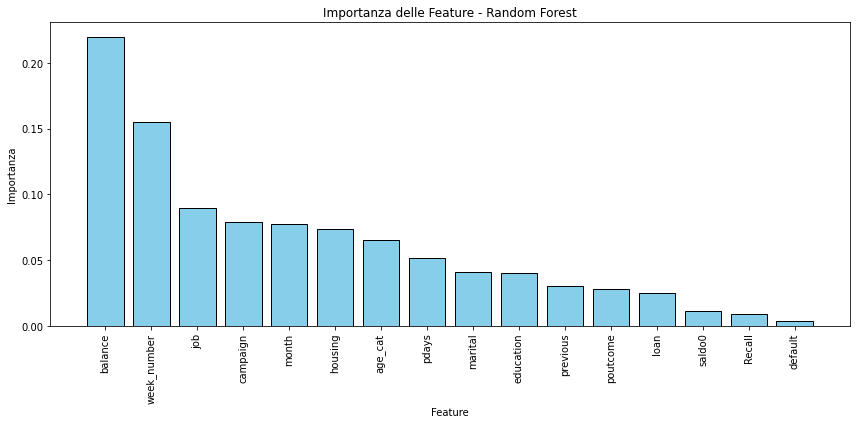

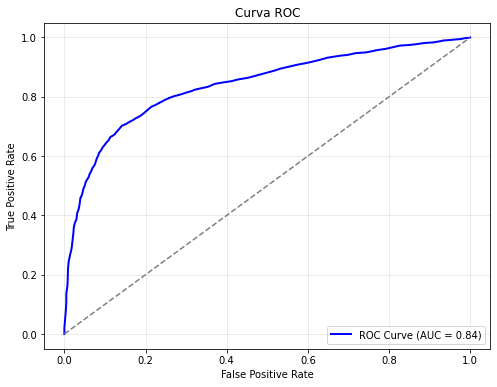

RandomForestClassifier(class_weight='balanced', random_state=42)

In [300]:
random_forest_analysis (test , 'y' )